In [3]:
from matplotlib import pyplot as io 
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import time
import os
from skimage import io
import urllib.request

Size of original image is : 7061662 bytes


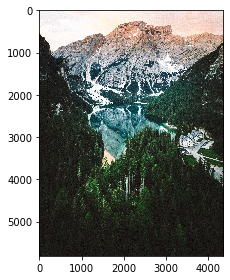

In [4]:
#save the image and get its size
urllib.request.urlretrieve("https://github.com/rupeshbiradar40/Image-Compression-Using-Clustering-and-PCA/raw/main/kristaps_ungurs.jpg", "kristaps_ungurs.jpg")
img_size=os.stat('kristaps_ungurs.jpg').st_size
print("Size of original image is : {} bytes".format(img_size))

# Image to array. image is saved as rows * columns * 3 array
img1 = io.imread('./kristaps_ungurs.jpg') 

io.imshow(img1)
io.show()

In [5]:
def k_means_clustering(img_in,k_val):
    global img_out
    global cltr
    rw = img_in.shape[0]
    cl = img_in.shape[1]

    image = img_in.reshape(img_in.shape[0]*img_in.shape[1],3)
    kmeans = KMeans(n_clusters = k_val, n_init=10, max_iter=200)
    kmeans.fit(image)

    cltr = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
    lbl1 = np.asarray(kmeans.labels_,dtype=np.uint8 )  
    lbls = lbl1.reshape(rw,cl)
    img_out = Image.fromarray(lbls)
    
    return img_out, cltr

In [6]:
from skimage import io

def comp_regen(cltr,path):
    global regen_image 
    
    image1 = io.imread(path) 
    regen_image = np.zeros((image1.shape[0],image1.shape[1],3),dtype=np.uint8 )
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
                regen_image [i,j,:] = cltr[image1[i,j],:]

In [8]:
k=[2,5,8]
img_name=['kristaps_ungurs']
exec_time=[]
comp_size=[]
comp_deg=[]

--- 68.65077543258667 seconds ---
Compressed size in bytes 986769
Degree of compression is  0.8602639152086293


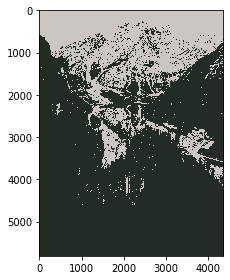

In [9]:
time1 = time.time()
k_means_clustering(img1,2)
time2=(time.time() - time1)
print("--- %s seconds ---" % time2)
path='./img_2.png'
img_out.save(path)

exec_time.append(time2)


# To show regened image from compressed image
comp_regen(cltr,path)
io.imsave('./img_2_regen.png',regen_image )
e1=os.stat('./img_2_regen.png').st_size
print('Compressed size in bytes',e1)
comp_size.append(e1)

# degree of compression
d1=1-(e1/img_size)
comp_deg.append(d1)
print('Degree of compression is ',d1)
io.imshow(regen_image )
io.show()

--- 281.9616644382477 seconds ---
Compressed size in bytes 3867941
Degree of compression is  0.4522619462670403


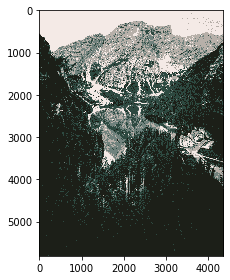

In [10]:
time1 = time.time()
k_means_clustering(img1,5)
time2=(time.time() - time1)
print("--- %s seconds ---" % time2)
path='img_5.png'
img_out.save(path)

exec_time.append(time2)


# To show regened image from compressed image
comp_regen(cltr,path)
io.imsave('img_5_regen.png',regen_image )
e1=os.stat('img_5_regen.png').st_size
print('Compressed size in bytes',e1)
comp_size.append(e1)

# degree of compression
d1=1-(e1/img_size)
comp_deg.append(d1)
print('Degree of compression is ',d1)
io.imshow(regen_image )
io.show()

--- 758.8912992477417 seconds ---
Compressed size in bytes 7882264
Degree of compression is  -0.1162052219435028


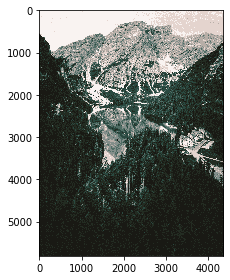

In [11]:
time1 = time.time()
k_means_clustering(img1,8)
time2=(time.time() - time1)
print("--- %s seconds ---" % time2)
path='img_8.png'
img_out.save(path)

exec_time.append(time2)


# To show regened image from compressed image
comp_regen(cltr,path)
io.imsave('img_8_regen.png',regen_image )
e1=os.stat('img_8_regen.png').st_size
print('Compressed size in bytes',e1)
comp_size.append(e1)

# degree of compression
d1=1-(e1/img_size)
comp_deg.append(d1)
print('Degree of compression is ',d1)
io.imshow(regen_image )
io.show()

In [12]:
# Image Compression using PCA
# Load Required Libraries
import cv2
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import stats
import matplotlib.image as mpimg


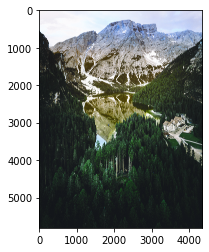

Shape of Original  Image: (5809, 4357, 3)


In [13]:
# Read the image from remote git repository and display in the workspace
image = cv2.cvtColor(io.imread('https://github.com/rupeshbiradar40/Image-Compression-Using-Clustering-and-PCA/raw/main/kristaps_ungurs.jpg'), cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()
print("Shape of Original  Image: {}".format(image.shape))

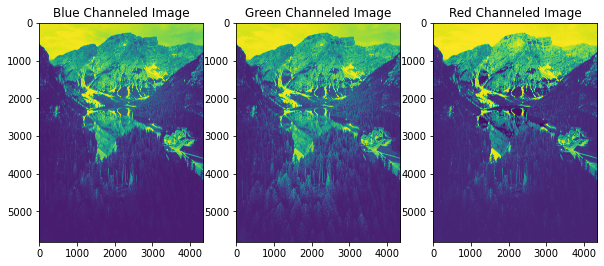

In [14]:
#Splitting the image into channels
blue, green, red = cv2.split(image)

# Plotting the individual images
fig = plt.figure(figsize = (10, 5)) 

fig.add_subplot(131)
plt.title("Blue Channeled Image")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channeled Image")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channeled Image")
plt.imshow(red)

plt.show()

In [15]:
# divide all the data of all channels by 255 so that the data is scaled between 0 and 1
blue_dataframe = blue/255
green_dataframe = green/255
red_dataframe = red/255

Using 10 principal components

Shape of transformed_pca_blue image: (5809, 10)
Shape of transformed_pca_green image: (5809, 10)
Shape of transformed_pca_red image: (5809, 10)

Variance ratios of the 10 PCA components for Blue Channelled image : 0.8528941361792444
Variance ratios of the 10 PCA components for Green Channelled image: 0.8359065571453735
Variance ratios of the 10 PCA components for Channelled image  : 0.8544728445548313
Above values explains that only using 10 components we can keep around 0.85 of variance in the data.

Shape of reverse transformed channeled images: (5809, 4357), (5809, 4357), (5809, 4357)
Shape of Compressed image: (5809, 4357, 3)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


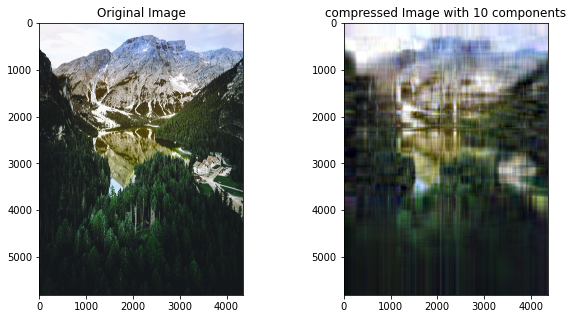

Size of compressed_Image_10_PCA.jpg is : 1.045781 mb


Using 30 principal components

Shape of transformed_pca_blue image: (5809, 30)
Shape of transformed_pca_green image: (5809, 30)
Shape of transformed_pca_red image: (5809, 30)

Variance ratios of the 30 PCA components for Blue Channelled image : 0.9066757359134195
Variance ratios of the 30 PCA components for Green Channelled image: 0.8931796240139842
Variance ratios of the 30 PCA components for Channelled image  : 0.9072407124715672
Above values explains that only using 30 components we can keep around 0.91 of variance in the data.

Shape of reverse transformed channeled images: (5809, 4357), (5809, 4357), (5809, 4357)
Shape of Compressed image: (5809, 4357, 3)



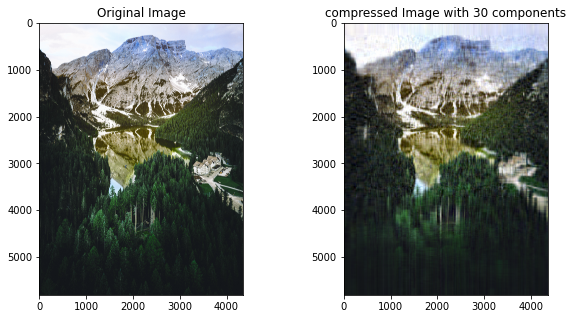

Size of compressed_Image_30_PCA.jpg is : 1.37895 mb


Using 50 principal components

Shape of transformed_pca_blue image: (5809, 50)
Shape of transformed_pca_green image: (5809, 50)
Shape of transformed_pca_red image: (5809, 50)

Variance ratios of the 50 PCA components for Blue Channelled image : 0.9253722371830342
Variance ratios of the 50 PCA components for Green Channelled image: 0.9140484956477706
Variance ratios of the 50 PCA components for Channelled image  : 0.9269377588332576
Above values explains that only using 50 components we can keep around 0.93 of variance in the data.

Shape of reverse transformed channeled images: (5809, 4357), (5809, 4357), (5809, 4357)
Shape of Compressed image: (5809, 4357, 3)



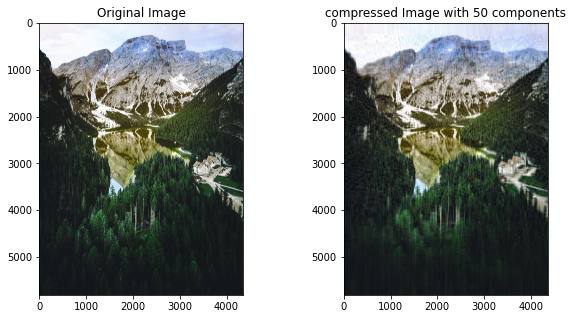

Size of compressed_Image_50_PCA.jpg is : 1.606444 mb




In [16]:
# Use 50 dimensions for PCA and fit and transform the channel data and observe variance after reducing data to 50 dimensions
n_components = [10, 30, 50]

for n in n_components:
  print("Using {} principal components\n".format(n))
  pca_blue = PCA(n_components=n)
  pca_blue.fit(blue_dataframe)
  transformed_pca_blue = pca_blue.transform(blue_dataframe)

  pca_green = PCA(n_components=n)
  pca_green.fit(green_dataframe)
  transformed_pca_green = pca_green.transform(green_dataframe)

  pca_red = PCA(n_components=n)
  pca_red.fit(red_dataframe)
  transformed_pca_red = pca_red.transform(red_dataframe)

  print("Shape of transformed_pca_blue image: {}".format(transformed_pca_blue.shape))
  print("Shape of transformed_pca_green image: {}".format(transformed_pca_green.shape))
  print("Shape of transformed_pca_red image: {}\n".format(transformed_pca_red.shape))

  # check the sum of explained variance ratios of the 50 PCA components for each channel. these will be 50 dominated igen values
  print("Variance ratios of the {} PCA components for Blue Channelled image : {}".format(n, sum(pca_blue.explained_variance_ratio_)))
  print("Variance ratios of the {} PCA components for Green Channelled image: {}".format(n, sum(pca_green.explained_variance_ratio_)))
  print("Variance ratios of the {} PCA components for Channelled image  : {}".format(n, sum(pca_red.explained_variance_ratio_)))
  print("Above values explains that only using {} components we can keep around {} of variance in the data.\n".format(n, round(sum(pca_blue.explained_variance_ratio_),2)))
  
  # visualize the image again by applyng reverse transform on the the data first and then merging the data of all the 3 channels into one
  reverse_transformed_blue = pca_blue.inverse_transform(transformed_pca_blue)
  reverse_transformed_green = pca_green.inverse_transform(transformed_pca_green)
  reverse_transformed_red = pca_red.inverse_transform(transformed_pca_red)
  print("Shape of reverse transformed channeled images: {}, {}, {}".format(reverse_transformed_blue.shape, reverse_transformed_green.shape, reverse_transformed_red.shape))

  compressed_image= (cv2.merge((reverse_transformed_blue, reverse_transformed_green, reverse_transformed_red)))
  print("Shape of Compressed image: {}\n".format(compressed_image.shape))

  # plot the compressed image
  fig = plt.figure(figsize = (10, 5)) 
  fig.add_subplot(121)
  plt.title("Original Image")
  plt.imshow(image)

  fig.add_subplot(122)
  plt.title("compressed Image with {} components".format(n))
  plt.imshow(compressed_image)
  plt.show()

  #save the compressed image and get the size of compressed image
  io.imsave("compressed_Image_"+str(n)+"_PCA.jpg", compressed_image)
  image_size=os.stat('compressed_Image_'+str(n)+'_PCA.jpg').st_size
  print("Size of compressed_Image_{}_PCA.jpg is : {} mb\n\n".format(n,  image_size/1000000))
  